# Simple Linear Regression

### Importing the libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load and split the dataset

In [2]:
dataset = pd.read_csv('house_prices.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1:].values

In [3]:
X[1:10]

array([[80.25],
       [80.54],
       [80.76],
       [80.9 ],
       [81.24],
       [81.34],
       [81.36],
       [81.61],
       [81.62]])

In [4]:
y[23:35]

array([[1265320.83],
       [ 939573.58],
       [1772706.77],
       [1136864.9 ],
       [1515222.6 ],
       [ 980372.66],
       [1773989.71],
       [1596548.19],
       [1326105.77],
       [1443935.72],
       [1494158.49],
       [1486821.88]])

In [5]:
dataset.sample(10)

,Area,Price
154,112.46,2114856.90
110,102.82,2459005.38
61,90.52,1746179.06
57,89.68,1928379.92
41,87.03,1501844.50
101,100.45,2304664.05
134,107.68,1836353.51
4,80.90,1467061.51
54,89.24,1896416.39
115,104.05,2328643.72


In [6]:
dataset.describe()

,Area,Price
count,200.000000,2.000000e+02
mean,100.121200,2.055583e+06
std,12.350508,5.924921e+05
min,80.220000,3.975178e+05
25%,88.672500,1.641542e+06
50%,100.375000,2.053933e+06
75%,111.282500,2.513602e+06
max,120.850000,3.359465e+06


Uncomment and run the next cell only if needed to create a subset of the data of size n that should be smaller than lenght of X

In [7]:
# n= 20
# index = random.sample(range(len(X)), n)
# X = X[index]
# y = y[index]

Splitting the dataset into the Training set and Test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
X_train.size

133

In [10]:
X_test.size

67

In [11]:
y_train.size

133

### Fit and predict

Create a LinearRegression object and use it to fit the data

In [12]:
regressor = LinearRegression()

In [13]:
type(regressor)

sklearn.linear_model._base.LinearRegression

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

Predict using the Test set results

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
y_pred[1:10]

array([[2703898.70473246],
       [2126328.65332474],
       [2047903.91266098],
       [2725996.28359352],
       [2790989.16259664],
       [1222927.63518139],
       [2485089.34542196],
       [1262789.9343033 ],
       [2565680.51538583]])

### Visualize the results

#### Training Set

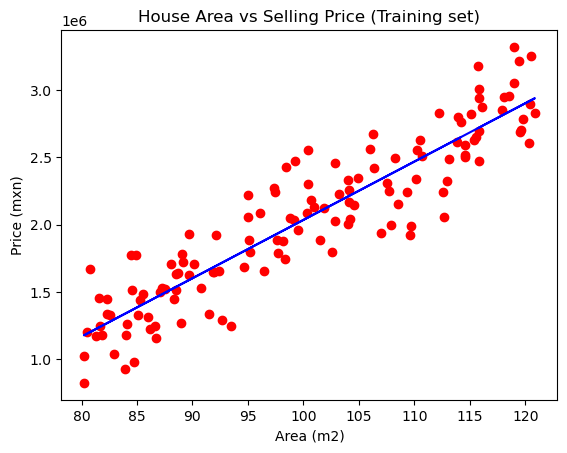

In [17]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('House Area vs Selling Price (Training set)')
plt.xlabel('Area (m2)')
plt.ylabel('Price (mxn)')
plt.show()

#### Test Set

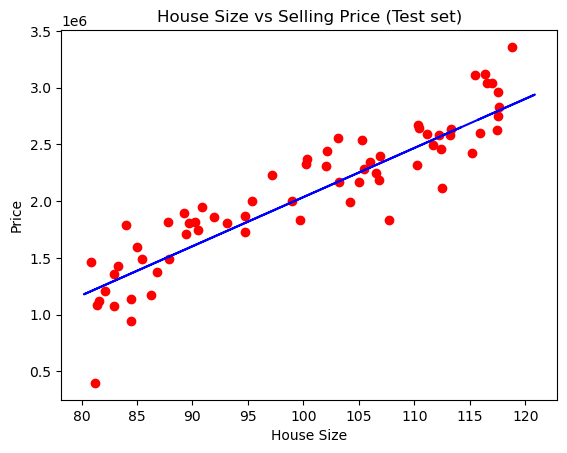

In [18]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('House Size vs Selling Price (Test set)')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()

#### Estimating the cost of one house

In [19]:
house_area=[[100]]
price = regressor.predict(house_area)
print(price)

[[2035771.9085804]]


### Metrics

In [20]:
y_test[1:5]

array([[3108136.83],
       [2444426.5 ],
       [2373014.79],
       [2604576.45]])

In [21]:
 y_pred[1:5]

array([[2703898.70473246],
       [2126328.65332474],
       [2047903.91266098],
       [2725996.28359352]])

In [22]:
# Root Medium Squared Error
#We need to take the sqrt of the mean_squared_error function
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Medium Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R^2 Varies between 0 and 1 (0 -> Better to take the mean of the data, 1 -> Perfect predictability)
r2 = r2_score(y_test, y_pred)
print(f"Determination Coefficient (R^2): {r2}")

Root Mean Squared Error (RMSE): 248429.116350497
Mean Absolute Error (MAE): 195654.31169227316
Determination Coefficient (R^2): 0.8318584273627959


In [23]:
print(f'Coeficient={regressor.coef_}')
print(f'Intercept={regressor.intercept_}')

Coeficient=[[43328.58600208]]
Intercept=[-2297086.69162753]


In [24]:
#Estimating the cost of one house
house_area=[[100]]
price = regressor.predict(house_area)
print((price))

[[2035771.9085804]]


### Scaling

In [25]:
#before scaling
X_train[:5]

array([[114.16],
       [ 88.94],
       [ 97.59],
       [109.31],
       [ 98.4 ]])

(array([15., 16., 15.,  9., 14., 14., 10., 10., 17., 13.]),
 array([ 80.22 ,  84.283,  88.346,  92.409,  96.472, 100.535, 104.598,
        108.661, 112.724, 116.787, 120.85 ]),
 <BarContainer object of 10 artists>)

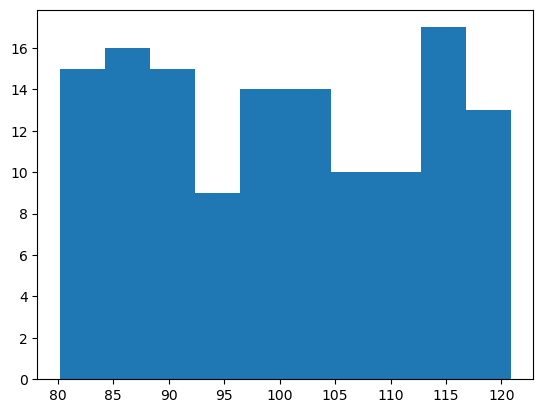

In [26]:
plt.hist(X_train, bins=10) 

In [27]:
print(X_train.mean())
print(X_train.std())

100.17037593984962
12.340383331198625


In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [29]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

(array([15., 16., 15.,  9., 14., 14., 10., 10., 17., 13.]),
 array([-1.61667392, -1.28742969, -0.95818546, -0.62894124, -0.29969701,
         0.02954722,  0.35879145,  0.68803568,  1.01727991,  1.34652414,
         1.67576837]),
 <BarContainer object of 10 artists>)

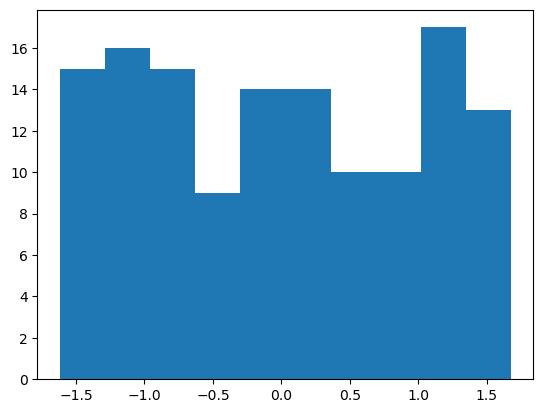

In [30]:
plt.hist(X_train, bins=10) 

In [31]:
print(X_train.mean())
print(X_train.std())

2.788078873870694e-16
0.9999999999999999


In [34]:
#After Scaling
X_train[:5]

array([[ 1.13364583],
       [-0.91005082],
       [-0.20910014],
       [ 0.74062724],
       [-0.14346199]])

In [35]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [36]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [38]:
#Estimating the cost of one house (need to transform back the data)
house_area=[[100]]
house_area = sc_X.transform(house_area)
price = regressor.predict(house_area)
print(sc_y.inverse_transform(price))

[[2035771.9085804]]
